## PREDICTION USING SUPERVISED ML
This code predicts the percentage of the marks of the students based on the number of hours they studied in.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
# Reading the Data 
data = pd.read_csv ('Student_hours_vs_Scores.csv')
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Check if there any null value in the Dataset
data.isnull == True

False

No null value is found in the dataset. 
## Data Visualization

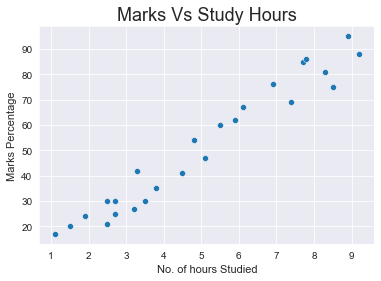

In [5]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=18)
plt.ylabel('Marks Percentage', size=11)
plt.xlabel('No. of hours Studied', size=11)
plt.show()

The above plot seems to imply that there's a correlation between Marks Percentage and N. of hours studied.
To confirm this, a regression line is plotted.

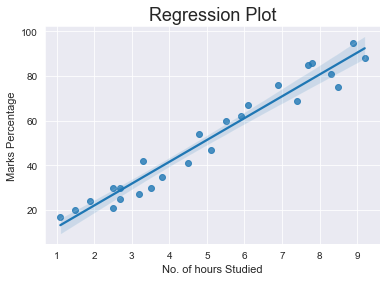

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [6]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=18)
plt.ylabel('Marks Percentage', size=11)
plt.xlabel('No. of hours Studied', size=11)
plt.show()
print(data.corr())

Variables are positively correlated

## Training Model
Data Splitting

In [7]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

Data Fitting in the model

In [9]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("--Model training completed--")

--Model training completed--


## Prediction

In [10]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


## Comparing predicted marks with actual marks

In [11]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


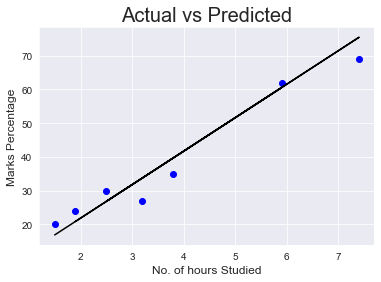

In [12]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('No. of hours Studied', size=12)
plt.show()

In [13]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502486


Mean absolute error is small. So this model is reliable for prediction

## What score will a student get if he/she studies 9.5 hours a day?

In [16]:
hours = [9.5]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 96.378
